In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sn
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import arviz as az

import theano
import covid19pandas as cod
#from country_codes import eurostat_dictionary
import eurostat
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

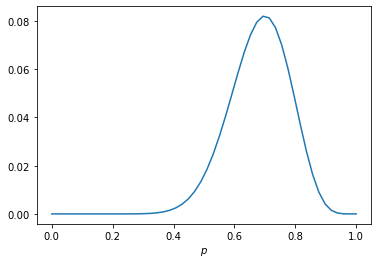

In [4]:
import scipy as sc
range_p = np.linspace(0,1,50) # in linspace you give starting point, end point and number of observations we want
prior = np.ones_like(range_p) #the prior is a vector, a range of values
likelihood = sc.stats.binom.pmf(14,20,range_p) #binomial distribution of a probability mass function
posterior = likelihood*prior/np.sum(likelihood*prior) # I calculate for each value and then normalize by dividing by the sum
plt.plot(range_p,posterior)
plt.xlabel('$p$');

With higher dimensions this will not work.
In higher dimensions we are going to use an algorithm called markov-chain Monte-Carlo. The idea of it is that I draw a random value of my prior and calculate the value of \phi of p_0, draw another random number and calcualte the \phi of p_1. Then, we calculate \phi p_1 /\phi p_0 .
Do the same for a new draw \phi p_2. In the markov chain you only look at the last draw that you have. 
You keep adding the values to the posterior. If you this long enough you're going to get to a good posterior list that resembels the psoterior distribution. 
Here you work with the numerator. 
There's a trade-off on how you specificate the algorithm (small steps closer to the prior, or larger steps with extreme values)

In [ ]:
https://github.com/chi-feng/mcmc-demo

Mcmc will converege tot he true posterior distribution if you sample long enough

In [5]:
def generating_data(a1=1,a2=-1, b=3, n=100): #the most important to play around with here is n
    x1=pm.Normal.dist(0,1).random(size=n)
    x2=pm.Normal.dist(0,1).random(size=n)
    noise=pm.Normal.dist(0,1).random(size=n)
    y= a1*x1 + a2*x2 + b + noise
    df= pd.DataFrame({'y':y,'x1':x1,'x2':x2})
    return df

df=generating_data()
df.head()

,y,x1,x2
0,0.675876,-0.538616,1.044065
1,-0.328690,-1.453707,1.665043
2,0.231319,-0.497380,1.452407
3,1.355211,-1.253997,0.028822
4,2.076020,-0.596028,1.019607


In [6]:
with pm.Model() as model_simulated_data:  # with creates a context 
    constant = pm.Normal ('constant',0,3) # specify the prior of the constant. this is just a random specification
    slope1 = pm.Normal('slope1',0,2)
    slope2 = pm.Normal('slope2',0,2)
    sigma = pm.HalfNormal('sigma',1) # here only specify 1
    obs = pm.Normal('obs', mu = constant + slope1*df.x1 + slope2*df.x2,\
                    sigma = sigma,observed = df.y)
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, slope2, slope1, constant]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


we specified our variables
Sigma has to be positive, I can only specify positive values.
We are having 8000 values of my list p_0,p_0,p_2,p_3


In [7]:
with model_simulated_data: 
    ppc_simulated_data = pm.sample_posterior_predictive(trace, var_names = ['obs']) # we only have one observed value, but it could be a list

data_posterior_simulated_data = az.from_pymc3(trace,
                                              posterior_predictive = ppc_simulated_data)

Once we have the model defined we can plot it

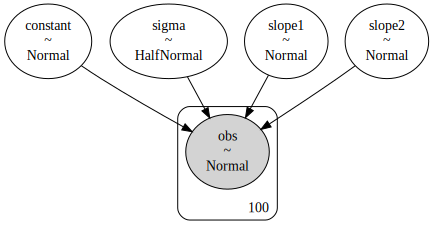

In [9]:
pm.model_to_graphviz(model_simulated_data)

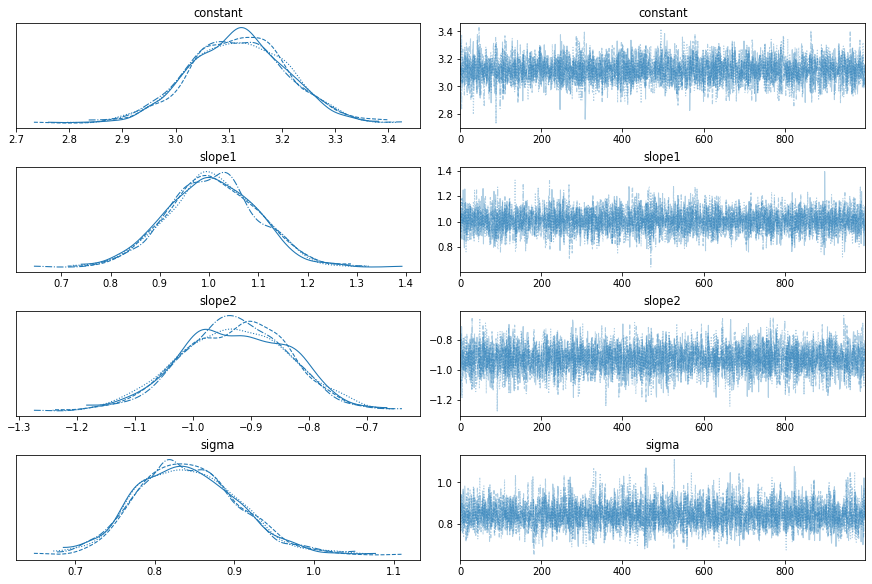

In [10]:
with model_simulated_data:
    pm.plot_trace(trace)